<a href="https://colab.research.google.com/github/carlospajoy18/CARLOS-PAJOY-PYTHON/blob/main/inflacionfunhuju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Cargar los datos desde el archivo CSV en tu Google Drive
file_path = '/content/drive/My Drive/pythoncarlospajoy/historico1.csv'
df = pd.read_csv(file_path)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

            Inflación
Fecha                
2023-09-01      10.99
2023-08-01      11.43
2023-07-01      11.78
2023-06-01      12.13
2023-05-01      12.36


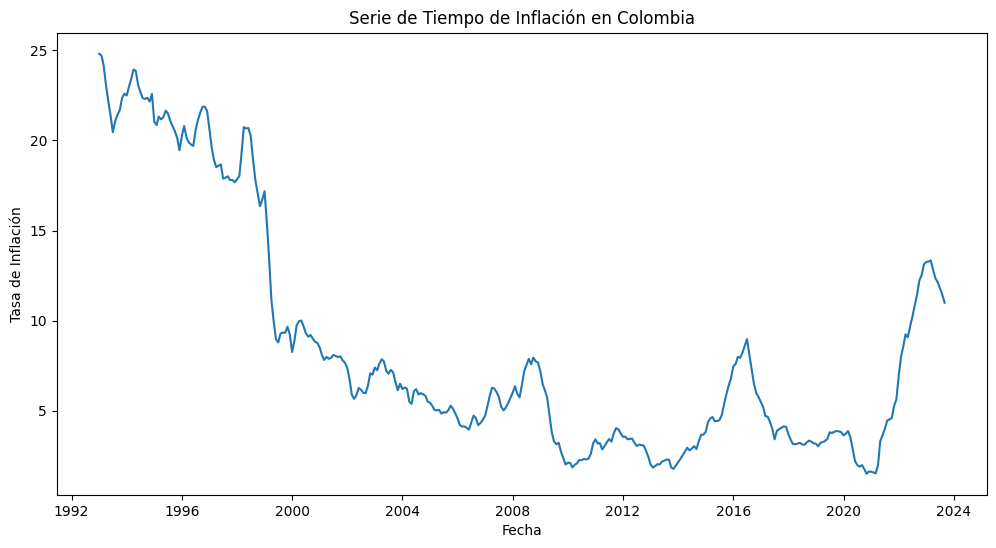

In [ ]:
import matplotlib.pyplot as plt

# Visualizar los primeros registros de datos
print(df.head())

# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Inflación'])
plt.title('Serie de Tiempo de Inflación en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Inflación')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de Dickey-Fuller para verificar la estacionariedad
result = adfuller(df['Inflación'])
print('Estadística ADF:', result[0])
print('Valor crítico ADF:', result[4]['5%'])
if result[0] > result[4]['5%']:
    print('La serie no es estacionaria. Se requiere diferenciación.')
    # Aplicar una diferenciación de primer orden
    df['Inflación'] = df['Inflación'].diff()
else:
    print('La serie es estacionaria. No se requiere diferenciación.')

# Repetir la prueba de estacionariedad si se realizó la diferenciación
if 'Inflación' in df:
    result = adfuller(df['Inflación'].dropna())
    print('Estadística ADF después de la diferenciación:', result[0])
    print('Valor crítico ADF:', result[4]['5%'])
    if result[0] > result[4]['5%']:
        print('La serie aún no es estacionaria después de la diferenciación. Puede ser necesaria otra diferenciación.')


Estadística ADF: 0.5036960406776954
Valor crítico ADF: -2.8697161816205705
La serie no es estacionaria. Se requiere diferenciación.
Estadística ADF después de la diferenciación: -5.255098458110036
Valor crítico ADF: -2.8697161816205705


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


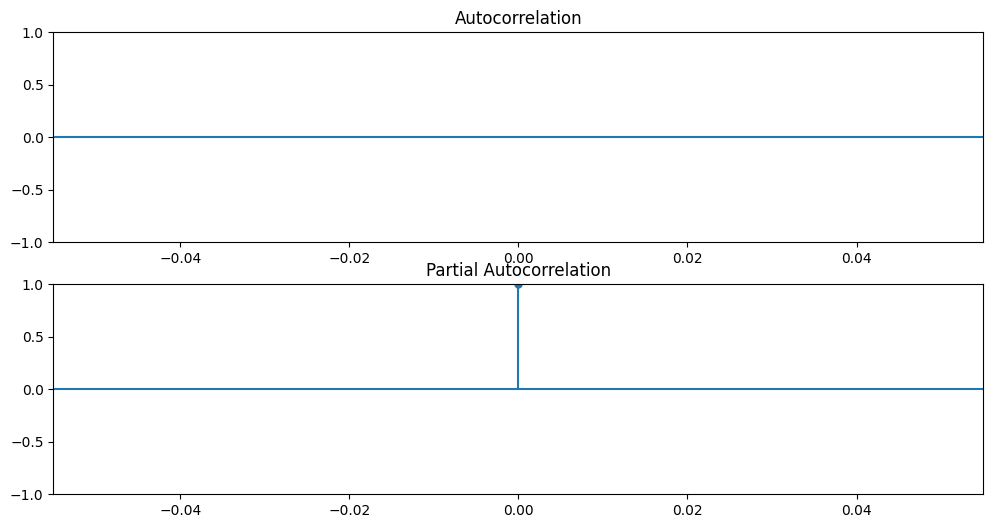

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la función de autocorrelación y la función de autocorrelación parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df['Inflación'], ax=ax1, lags=40)
plot_pacf(df['Inflación'], ax=ax2, lags=40)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con los valores de p, d y q seleccionados
p = 2  # Reemplaza con el valor seleccionado
d = 2  # Reemplaza con el valor seleccionado
q = 2  # Reemplaza con el valor seleccionado

model = ARIMA(df['Inflación'], order=(p, d, q))
results = model.fit()

# Resumen del modelo
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so i

                               SARIMAX Results                                
Dep. Variable:              Inflación   No. Observations:                  369
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -210.400
Date:                Fri, 13 Oct 2023   AIC                            430.799
Time:                        03:42:29   BIC                            450.326
Sample:                             0   HQIC                           438.558
                                - 369                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1526      0.054    -21.264      0.000      -1.259      -1.046
ar.L2         -0.2323      0.051     -4.588      0.000      -0.332      -0.133
ma.L1         -0.0001   2.59e+04  -5.64e-09      1.0

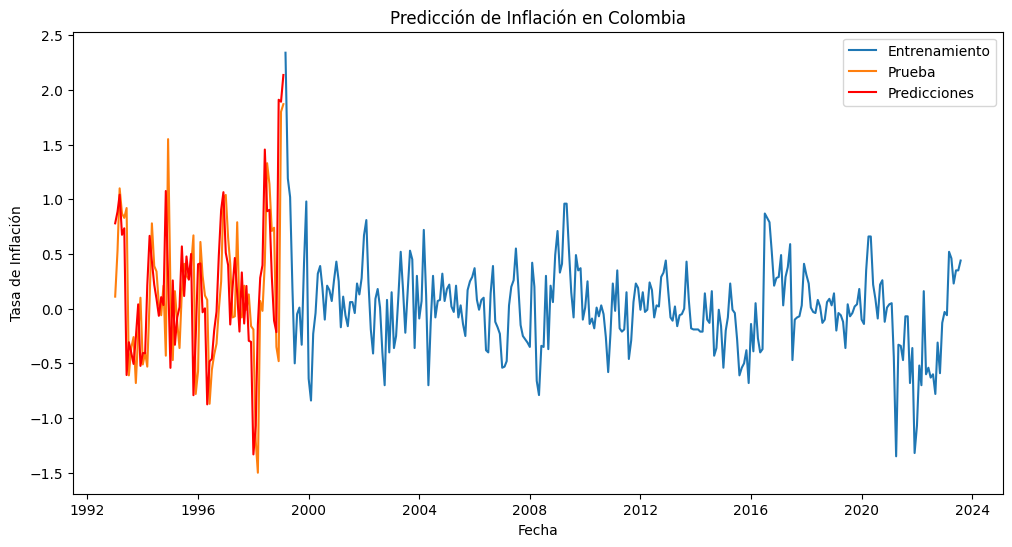

In [ ]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
train_size = int(len(df) * 0.8)
train, test = df['Inflación'].iloc[:train_size], df['Inflación'].iloc[train_size:]

# Realizar predicciones en el conjunto de prueba
predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Graficar las predicciones y los datos reales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.title('Predicción de Inflación en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Inflación')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


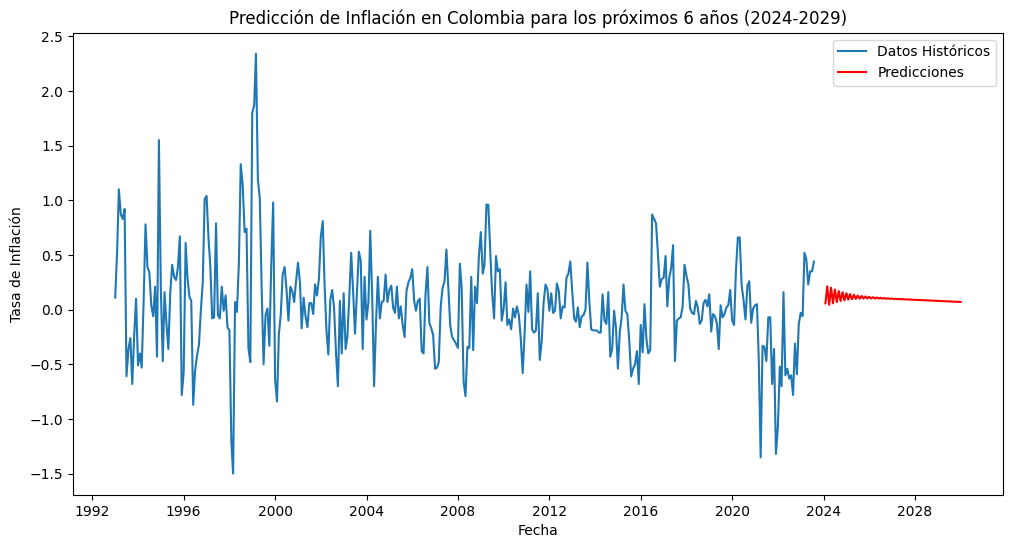

In [ ]:
# Realizar predicciones a 6 años en el futuro
forecast_steps = 6 * 12  # 6 años * 12 meses por año
forecast = results.forecast(steps=forecast_steps)

# Crear un índice para las predicciones a partir de 2024
index_forecast = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='M')

# Graficar las predicciones a 6 años
plt.figure(figsize=(12, 6))
plt.plot(df['Inflación'], label='Datos Históricos')
plt.plot(index_forecast, forecast, label='Predicciones', color='red')
plt.title('Predicción de Inflación en Colombia para los próximos 6 años (2024-2029)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Inflación')
plt.legend()


In [1]:
from google.colab import files
uploaded = files.upload()

Saving ihistorico.csv to ihistorico.csv


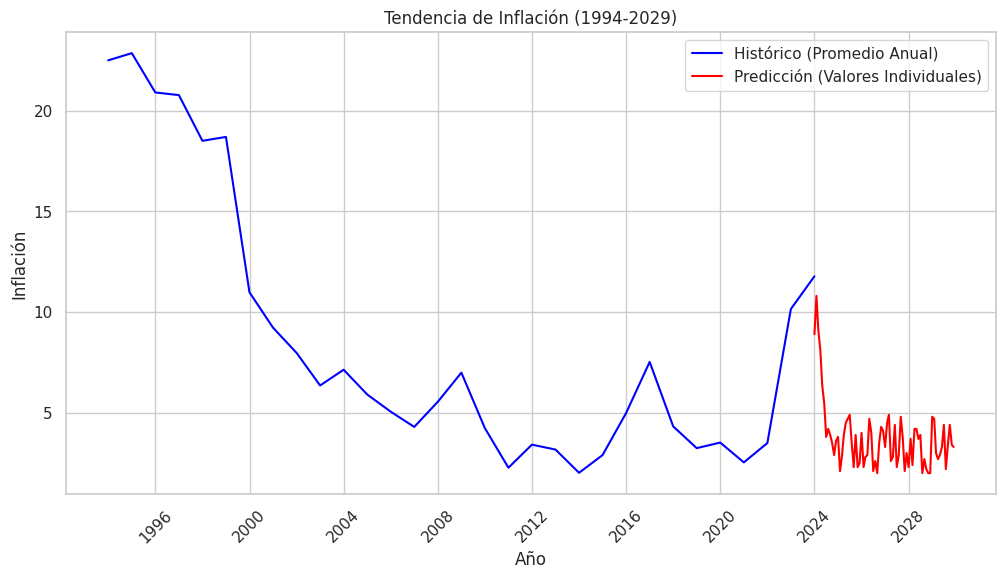

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
data = pd.read_csv('ihistorico.csv')
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Crear un nuevo DataFrame con la inflación promedio por año para el período histórico (1994-2023)
historico = data[data['Fecha'] <= '2023-12-31']
inflacion_anual = historico.resample('Y', on='Fecha').mean()

# Configurar el estilo y colores del gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Graficar la inflación promedio anual para el período histórico
sns.lineplot(x=inflacion_anual.index, y='Inflación', data=inflacion_anual, color='blue', label='Histórico (Promedio Anual)')

# Para el período de predicción, los valores individuales
prediccion = data[data['Fecha'] >= '2024-01-01']
sns.lineplot(x='Fecha', y='Inflación', data=prediccion, color='red', label='Predicción (Valores Individuales)')

# Configurar etiquetas y título
plt.title('Tendencia de Inflación (1994-2029)')
plt.xlabel('Año')
plt.ylabel('Inflación')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()